## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [2]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

csv_file = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAT/csv/사교육비조사.csv", encoding='cp949')

In [5]:
csv_file.head(10)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.000000,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
5,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,23.607808,2,NaN,71.0,51.0,1.0,4,3.0
6,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,39.619805,2,NaN,51.0,41.0,1.0,2,1.0
7,1,11,1,1,0.666667,0.0,1.000000,1.000000,0.000000,64.921473,1,NaN,31.0,31.0,1.0,2,1.0
8,1,11,1,1,0.666667,0.0,1.333333,0.000000,1.333333,118.039042,1,NaN,51.0,51.0,1.0,3,8.0
9,1,11,1,1,0.666667,0.0,10.333333,10.333333,0.000000,360.806005,3,NaN,41.0,51.0,3.0,2,1.0


1.2 불러온 데이터의 요약 정보를 출력하세요.

In [6]:
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


1.2 데이터의 기술통계량을 출력하세요.

In [7]:
csv_file.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,36479.000000,71582.000000,72712.000000,75440.000000,75785.000000,39306.000000
mean,2.626654,27.592188,2.309006,1.453982,2.609993,3.599502,5.669939,4.002366,1.607508,346.718328,2.163766,3.178486,43.391872,41.457572,2.287354,4.298080,1.958709
std,0.955592,8.542575,0.947334,0.497881,3.764333,9.634226,6.230053,5.357766,3.557269,407.001971,0.721118,1.248837,11.510979,10.592290,0.950272,2.116495,1.578397
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,3.000000,31.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,236.078084,2.000000,3.000000,41.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,35.000000,3.000000,2.000000,4.000000,0.000000,10.000000,7.000000,1.666667,563.046231,3.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,4.000000,39.000000,4.000000,2.000000,40.000000,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [6]:
csv_file = csv_file[csv_file['학교급구분코드']==3]

In [7]:
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30052 entries, 4920 to 75682
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        30052 non-null  int64  
 1   행정구역시도코드      30052 non-null  int64  
 2   학교급구분코드       30052 non-null  int64  
 3   방과후학교참여여부     30052 non-null  int64  
 4   방과후학교참여시간수    30052 non-null  float64
 5   EBS교재비        30052 non-null  float64
 6   사교육참여시간수      30052 non-null  float64
 7   일반교과사교육시간수    30052 non-null  float64
 8   예체능사교육시간수     30052 non-null  float64
 9   사교육비총비용       30052 non-null  float64
 10  총자녀수          30052 non-null  int64  
 11  학생성적구분코드      30052 non-null  float64
 12  부_교육정도코드      28483 non-null  float64
 13  모_교육정도코드      29074 non-null  float64
 14  부모경제활동코드      29947 non-null  float64
 15  월평균가구소득코드     30052 non-null  int64  
 16  진학희망고등학교유형코드  0 non-null      float64
dtypes: float64(11), int64(6)
memory usage: 4.1 MB


In [7]:
csv_file = csv_file.drop('학교급구분코드',axis=1)

2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [8]:
csv_file = csv_file.drop(columns = ['지역구분코드','행정구역시도코드'], axis=1)

2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [9]:
csv_file['방과후학교참여여부'].value_counts()

1    18498
2    11554
Name: 방과후학교참여여부, dtype: int64

In [10]:
csv_file = pd.get_dummies(csv_file, columns = ['방과후학교참여여부'])

In [11]:
csv_file.rename(columns={'방과후학교참여여부_1':'방과후학교참여', '방과후학교참여여부_2':'방과후학교미참여'}, inplace=True)

In [ ]:
csv_file

2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [12]:
csv_file = csv_file.drop(columns = ['EBS교재비'], axis=1)

In [16]:
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30052 entries, 4920 to 75682
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   방과후학교참여시간수    30052 non-null  float64
 1   사교육참여시간수      30052 non-null  float64
 2   일반교과사교육시간수    30052 non-null  float64
 3   예체능사교육시간수     30052 non-null  float64
 4   사교육비총비용       30052 non-null  float64
 5   총자녀수          30052 non-null  int64  
 6   학생성적구분코드      30052 non-null  float64
 7   부_교육정도코드      28483 non-null  float64
 8   모_교육정도코드      29074 non-null  float64
 9   부모경제활동코드      29947 non-null  float64
 10  월평균가구소득코드     30052 non-null  int64  
 11  진학희망고등학교유형코드  0 non-null      float64
 12  방과후학교참여       30052 non-null  uint8  
 13  방과후학교미참여      30052 non-null  uint8  
dtypes: float64(10), int64(2), uint8(2)
memory usage: 3.0 MB


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

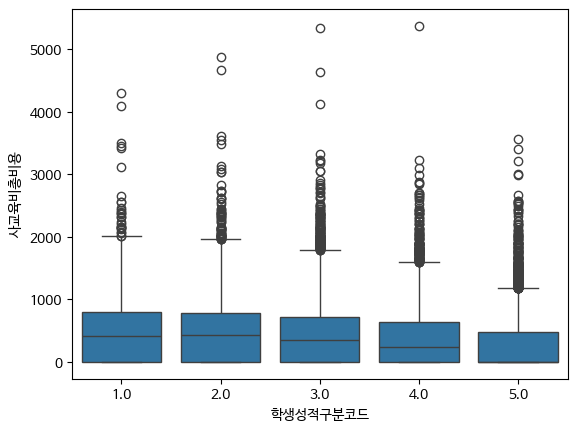

In [13]:
sns.boxplot(x='학생성적구분코드',
            y='사교육비총비용',
            data=csv_file,
            width=0.8)
plt.show()

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [14]:

conditions = [
    csv_file['학생성적구분코드'].isin([1, 2]),
    csv_file['학생성적구분코드'].isin([4, 5])
]
choices = ['상위', '하위']
csv_file['학생성적구분코드'] = np.select(conditions, choices, default=csv_file['학생성적구분코드'])

In [15]:
csv_file['학생성적구분코드'].value_counts()

하위     11833
상위      9187
3.0     9032
Name: 학생성적구분코드, dtype: int64

In [16]:
csv_file = pd.get_dummies(csv_file, columns = ['학생성적구분코드'])

In [17]:
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30052 entries, 4920 to 75682
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   방과후학교참여시간수    30052 non-null  float64
 1   사교육참여시간수      30052 non-null  float64
 2   일반교과사교육시간수    30052 non-null  float64
 3   예체능사교육시간수     30052 non-null  float64
 4   사교육비총비용       30052 non-null  float64
 5   총자녀수          30052 non-null  int64  
 6   부_교육정도코드      28483 non-null  float64
 7   모_교육정도코드      29074 non-null  float64
 8   부모경제활동코드      29947 non-null  float64
 9   월평균가구소득코드     30052 non-null  int64  
 10  진학희망고등학교유형코드  0 non-null      float64
 11  방과후학교참여       30052 non-null  uint8  
 12  방과후학교미참여      30052 non-null  uint8  
 13  학생성적구분코드_3.0  30052 non-null  uint8  
 14  학생성적구분코드_상위   30052 non-null  uint8  
 15  학생성적구분코드_하위   30052 non-null  uint8  
dtypes: float64(9), int64(2), uint8(5)
memory usage: 2.9 MB


In [18]:
csv_file.rename(columns={'학생성적구분코드_3.0':'중간학생성적', '학생성적구분코드_상위':'상위학생성적', '학생성적구분코드_하위':'하위학생성적'}, inplace=True)

2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A:레이블 인코딩은 각 고유값에 고유한 정수를 할당하는 반면, 원-핫 인코딩은 각 고유값을 개별적으로 나타내는 이진 열을 생성한다.

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요.

A: 회귀분석에서 사용된 모형의 일부 설명 변수가 다른 설명 변수와 상관 정도가 높아 데이터 분석 시 부정적인 영향을 미치는 현상을 다중공선성이라고 한다.

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

In [19]:
selected_columns = csv_file[['사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수']]

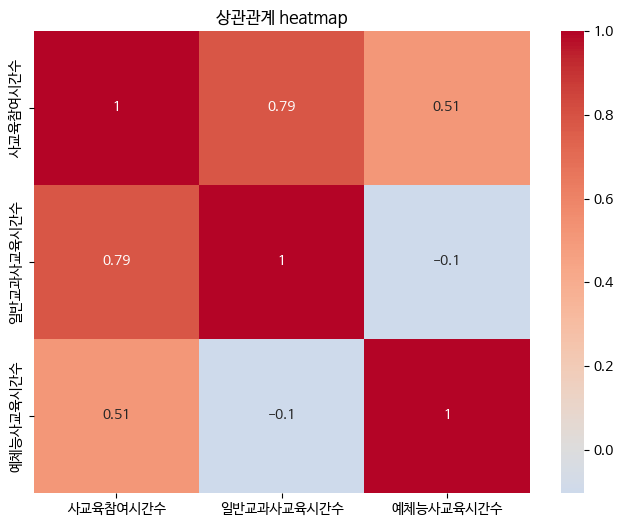

In [20]:
corr = selected_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('상관관계 heatmap')
plt.show()

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [37]:
csv_file = csv_file.drop('진학희망고등학교유형코드', axis=1)

In [40]:
csv_file['모_교육정도코드'].value_counts()

31.0    11076
51.0     9873
41.0     4729
61.0     1071
21.0      346
54.0      291
44.0      261
71.0      255
62.0      154
42.0      147
53.0      115
52.0      113
11.0      111
63.0       99
34.0       94
72.0       74
43.0       45
45.0       37
73.0       36
55.0       35
24.0       33
64.0       28
32.0       24
14.0        7
74.0        6
65.0        5
75.0        3
12.0        3
22.0        1
35.0        1
8.0         1
Name: 모_교육정도코드, dtype: int64

In [41]:
csv_file.head()

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,방과후학교참여,방과후학교미참여,중간학생성적,상위학생성적,하위학생성적
4920,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,1,0,0,1,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,1,0,1,0,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,1,0,0,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,1,0,0,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,1,0,0,0,1


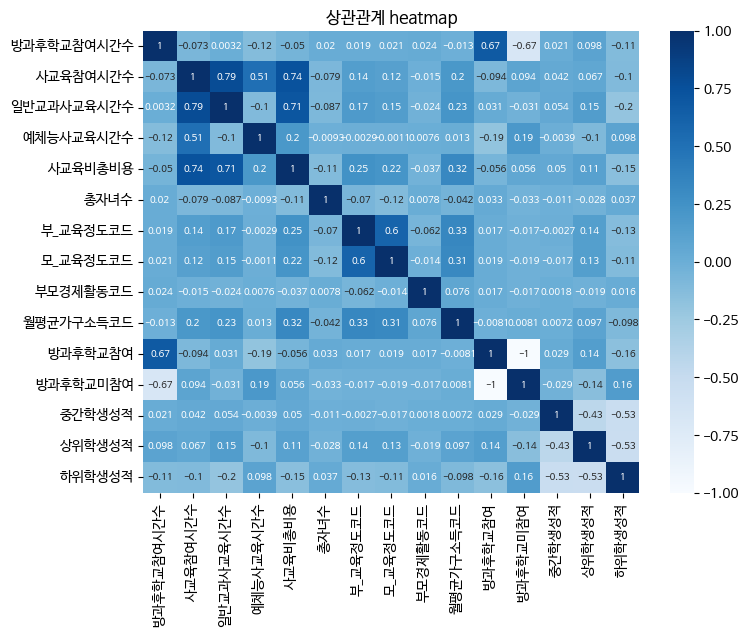

In [48]:
corr = csv_file.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', center=0, annot_kws={'size': 7})
plt.title('상관관계 heatmap')
plt.show()


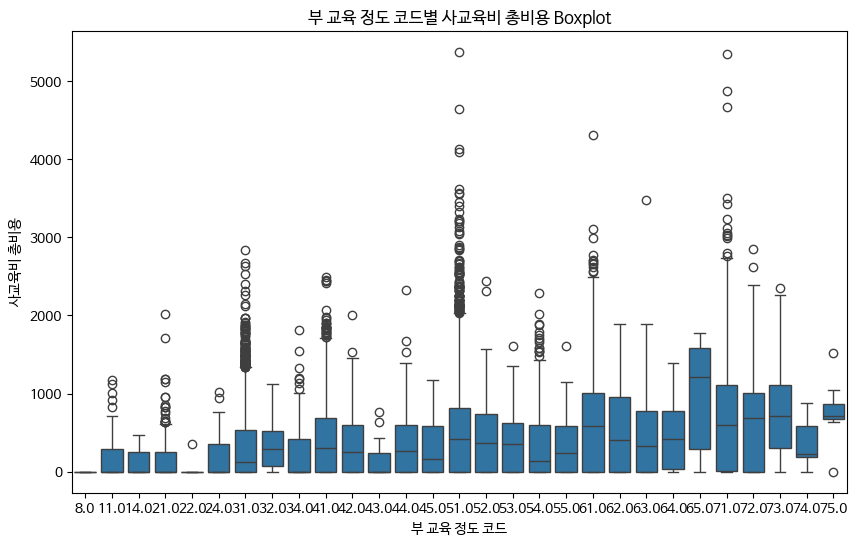

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=csv_file['부_교육정도코드'], y=csv_file['사교육비총비용'], data=csv_file)
plt.title('부 교육 정도 코드별 사교육비 총비용 Boxplot')
plt.xlabel('부 교육 정도 코드')
plt.ylabel('사교육비 총비용')
plt.show()

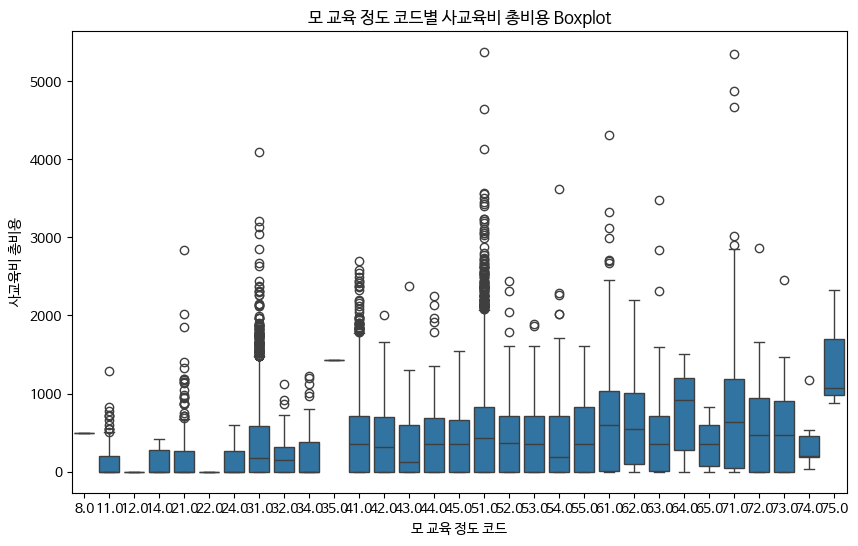

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=csv_file['모_교육정도코드'], y=csv_file['사교육비총비용'], data=csv_file)
plt.title('모 교육 정도 코드별 사교육비 총비용 Boxplot')
plt.xlabel('모 교육 정도 코드')
plt.ylabel('사교육비 총비용')
plt.show()

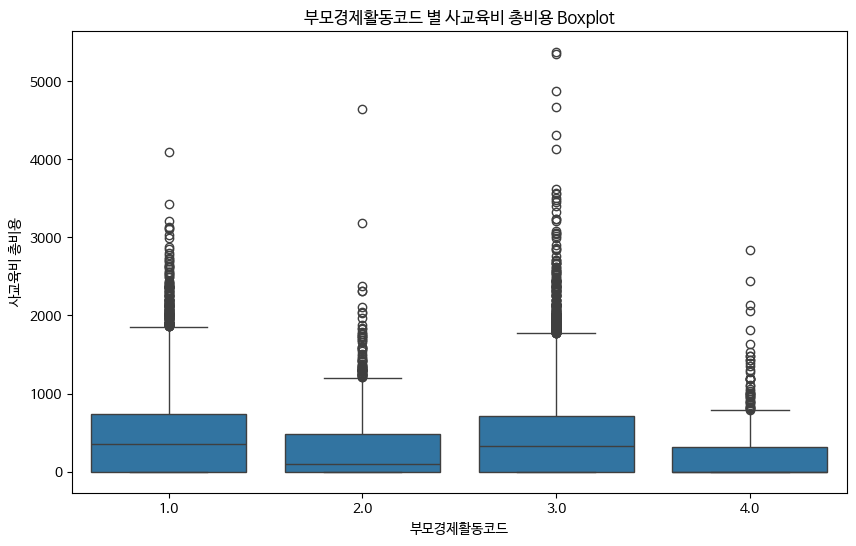

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=csv_file['부모경제활동코드'], y=csv_file['사교육비총비용'], data=csv_file)
plt.title('부모경제활동코드 별 사교육비 총비용 Boxplot')
plt.xlabel('부모경제활동코드')
plt.ylabel('사교육비 총비용')
plt.show()

In [21]:
csv_file.isna().sum()

방과후학교참여시간수          0
사교육참여시간수            0
일반교과사교육시간수          0
예체능사교육시간수           0
사교육비총비용             0
총자녀수                0
부_교육정도코드         1569
모_교육정도코드          978
부모경제활동코드          105
월평균가구소득코드           0
진학희망고등학교유형코드    30052
방과후학교참여             0
방과후학교미참여            0
중간학생성적              0
상위학생성적              0
하위학생성적              0
dtype: int64

In [22]:
# null 값이 있는 컬럼은 전부 제거

csv_file = csv_file.drop(columns=['부_교육정도코드','모_교육정도코드','부모경제활동코드','진학희망고등학교유형코드'], axis=1)

In [23]:
csv_file

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,월평균가구소득코드,방과후학교참여,방과후학교미참여,중간학생성적,상위학생성적,하위학생성적
4920,0.333333,0.0,0.0,0.0,0.000000,1,4,1,0,0,1,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,6,1,0,1,0,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,4,1,0,0,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,1,1,0,0,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,8,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,4,0,1,0,0,1
75679,0.000000,0.0,0.0,0.0,0.000000,4,6,0,1,0,0,1
75680,0.000000,0.0,0.0,0.0,105.000000,3,8,0,1,0,0,1
75681,0.000000,0.0,0.0,0.0,112.500000,2,5,0,1,0,1,0


### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

In [27]:
!pip install optuna
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.6 MB/s eta 0:00:00


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 모델링 관련 라이브러리
import xgboost as xgb
import catboost as cb
import optuna

from sklearn.ensemble import VotingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error

In [29]:
# train, test 데이터 분리
X = csv_file.drop('사교육비총비용', axis=1)
Y = csv_file['사교육비총비용']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
# Optuna를 사용하여 최적화할 목적 함수 정의
def objective(trial):
    # LightGBM 하이퍼파라미터
    lgbm_params = {
        'n_estimators': trial.suggest_int('lgbm_n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('lgbm_learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('lgbm_max_depth', 3, 20),
        'num_leaves': trial.suggest_int('lgbm_num_leaves', 20, 100),
    }

    # XGBoost 하이퍼파라미터
    xgb_params = {
        'n_estimators': trial.suggest_int('xgb_n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('xgb_learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('xgb_max_depth', 3, 20),
    }

    # CatBoost 하이퍼파라미터
    cat_params = {
        'iterations': trial.suggest_int('cat_iterations', 100, 1000),
        'learning_rate': trial.suggest_float('cat_learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('cat_depth', 3, 10),
    }

    # 모델 인스턴스 생성
    lgbm_model = LGBMRegressor(**lgbm_params)
    xgb_model = XGBRegressor(**xgb_params)
    catboost_model = CatBoostRegressor(**cat_params, verbose=False)

    # Voting Regressor 정의
    voting_regressor = VotingRegressor(
        estimators=[
            ('lgbm', lgbm_model),
            ('xgb', xgb_model),
            ('catboost', catboost_model)
        ]
    )

    # 교차 검증을 사용한 스코어 계산
    scores = cross_val_score(voting_regressor, X_train, y_train, cv=3, scoring='neg_mean_squared_error', error_score='raise')
    rmse_score = np.mean(np.sqrt(-scores))

    return rmse_score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)  # 시험 횟수를 10으로 설정

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2024-03-08 10:48:05,204] A new study created in memory with name: no-name-686a553e-0e50-42bc-b09f-82736547282e


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 16027, number of used features: 11
[LightGBM] [Info] Start training from score 420.267852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-03-08 10:49:41,202] Trial 0 finished with value: 271.93647899642696 and parameters: {'lgbm_n_estimators': 107, 'lgbm_learning_rate': 0.07420301978650054, 'lgbm_max_depth': 17, 'lgbm_num_leaves': 86, 'xgb_n_estimators': 547, 'xgb_learning_rate': 0.07298341072922188, 'xgb_max_depth': 18, 'cat_iterations': 839, 'cat_learning_rate': 0.07249672032716595, 'cat_depth': 3}. Best is trial 0 with value: 271.93647899642696.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 16027, number of used features: 11
[LightGBM] [Info] Start training from score 420.267852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-03-08 10:50:07,086] Trial 1 finished with value: 272.1728644425054 and parameters: {'lgbm_n_estimators': 460, 'lgbm_learning_rate': 0.08037173603960775, 'lgbm_max_depth': 18, 'lgbm_num_leaves': 45, 'xgb_n_estimators': 559, 'xgb_learning_rate': 0.09113238668291039, 'xgb_max_depth': 10, 'cat_iterations': 931, 'cat_learning_rate': 0.025502698333871608, 'cat_depth': 6}. Best is trial 0 with value: 271.93647899642696.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 16027, number of used features: 11
[LightGBM] [Info] Start training from score 420.267852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-03-08 10:50:20,891] Trial 2 finished with value: 262.9881780747707 and parameters: {'lgbm_n_estimators': 247, 'lgbm_learning_rate': 0.05882959061945013, 'lgbm_max_depth': 7, 'lgbm_num_leaves': 21, 'xgb_n_estimators': 217, 'xgb_learning_rate': 0.06954801146379211, 'xgb_max_depth': 3, 'cat_iterations': 260, 'cat_learning_rate': 0.040781778806402755, 'cat_depth': 10}. Best is trial 2 with value: 262.9881780747707.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 16027, number of used features: 11
[LightGBM] [Info] Start training from score 420.267852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-03-08 10:50:57,421] Trial 3 finished with value: 270.7991908328631 and parameters: {'lgbm_n_estimators': 783, 'lgbm_learning_rate': 0.08686640465960847, 'lgbm_max_depth': 17, 'lgbm_num_leaves': 91, 'xgb_n_estimators': 750, 'xgb_learning_rate': 0.030299976409963097, 'xgb_max_depth': 8, 'cat_iterations': 528, 'cat_learning_rate': 0.02979329101431831, 'cat_depth': 9}. Best is trial 2 with value: 262.9881780747707.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 16027, number of used features: 11
[LightGBM] [Info] Start training from score 420.267852
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 16027, number of used features: 11
[LightGBM] [Info] Start training from score 416.551830
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 16028, number of used features: 11
[LightGBM] [Info] Start tr

[I 2024-03-08 10:52:11,550] Trial 4 finished with value: 270.5929589791868 and parameters: {'lgbm_n_estimators': 158, 'lgbm_learning_rate': 0.07495709148002329, 'lgbm_max_depth': 19, 'lgbm_num_leaves': 42, 'xgb_n_estimators': 916, 'xgb_learning_rate': 0.09446736071249237, 'xgb_max_depth': 19, 'cat_iterations': 899, 'cat_learning_rate': 0.01171712259678722, 'cat_depth': 3}. Best is trial 2 with value: 262.9881780747707.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 16027, number of used features: 11
[LightGBM] [Info] Start training from score 420.267852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-03-08 10:52:25,226] Trial 5 finished with value: 264.8065832194659 and parameters: {'lgbm_n_estimators': 410, 'lgbm_learning_rate': 0.044110058894643686, 'lgbm_max_depth': 15, 'lgbm_num_leaves': 50, 'xgb_n_estimators': 545, 'xgb_learning_rate': 0.04489836986229679, 'xgb_max_depth': 5, 'cat_iterations': 638, 'cat_learning_rate': 0.0644642652687127, 'cat_depth': 5}. Best is trial 2 with value: 262.9881780747707.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 16027, number of used features: 11
[LightGBM] [Info] Start training from score 420.267852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-03-08 10:53:04,877] Trial 6 finished with value: 271.6866797538831 and parameters: {'lgbm_n_estimators': 655, 'lgbm_learning_rate': 0.039742166385459916, 'lgbm_max_depth': 11, 'lgbm_num_leaves': 100, 'xgb_n_estimators': 264, 'xgb_learning_rate': 0.09171946740531421, 'xgb_max_depth': 16, 'cat_iterations': 326, 'cat_learning_rate': 0.023027691353382604, 'cat_depth': 5}. Best is trial 2 with value: 262.9881780747707.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 16027, number of used features: 11
[LightGBM] [Info] Start training from score 420.267852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-03-08 10:53:24,186] Trial 7 finished with value: 267.09149964180665 and parameters: {'lgbm_n_estimators': 607, 'lgbm_learning_rate': 0.02690773486194282, 'lgbm_max_depth': 3, 'lgbm_num_leaves': 83, 'xgb_n_estimators': 603, 'xgb_learning_rate': 0.0671960656926516, 'xgb_max_depth': 10, 'cat_iterations': 256, 'cat_learning_rate': 0.085134243954682, 'cat_depth': 5}. Best is trial 2 with value: 262.9881780747707.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 16027, number of used features: 11
[LightGBM] [Info] Start training from score 420.267852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-03-08 10:53:52,860] Trial 8 finished with value: 263.9109653637278 and parameters: {'lgbm_n_estimators': 256, 'lgbm_learning_rate': 0.09462427853280604, 'lgbm_max_depth': 6, 'lgbm_num_leaves': 71, 'xgb_n_estimators': 311, 'xgb_learning_rate': 0.02878769469680411, 'xgb_max_depth': 4, 'cat_iterations': 686, 'cat_learning_rate': 0.05131636421088699, 'cat_depth': 10}. Best is trial 2 with value: 262.9881780747707.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 16027, number of used features: 11
[LightGBM] [Info] Start training from score 420.267852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-03-08 10:54:04,864] Trial 9 finished with value: 263.3673894652393 and parameters: {'lgbm_n_estimators': 405, 'lgbm_learning_rate': 0.05609897530869137, 'lgbm_max_depth': 6, 'lgbm_num_leaves': 54, 'xgb_n_estimators': 376, 'xgb_learning_rate': 0.010970805018036612, 'xgb_max_depth': 7, 'cat_iterations': 434, 'cat_learning_rate': 0.017997272640949462, 'cat_depth': 6}. Best is trial 2 with value: 262.9881780747707.


Number of finished trials:  10
Best trial:
  Value:  262.9881780747707
  Params: 
    lgbm_n_estimators: 247
    lgbm_learning_rate: 0.05882959061945013
    lgbm_max_depth: 7
    lgbm_num_leaves: 21
    xgb_n_estimators: 217
    xgb_learning_rate: 0.06954801146379211
    xgb_max_depth: 3
    cat_iterations: 260
    cat_learning_rate: 0.040781778806402755
    cat_depth: 10


In [34]:
# 최적화된 하이퍼파라미터를 기반으로 모델 구성
best_lgbm_params = {
    'n_estimators': study.best_params['lgbm_n_estimators'],
    'learning_rate': study.best_params['lgbm_learning_rate'],
    'max_depth': study.best_params['lgbm_max_depth'],
    'num_leaves': study.best_params['lgbm_num_leaves'],
    'n_jobs': -1,
}

best_xgb_params = {
    'n_estimators': study.best_params['xgb_n_estimators'],
    'learning_rate': study.best_params['xgb_learning_rate'],
    'max_depth': study.best_params['xgb_max_depth'],
    'n_jobs': -1,
}

best_cat_params = {
    'iterations': study.best_params['cat_iterations'],
    'learning_rate': study.best_params['cat_learning_rate'],
    'depth': study.best_params['cat_depth'],
    'verbose': 0,
}

# 모델 인스턴스 생성
lgbm_model = LGBMRegressor(**best_lgbm_params)
xgb_model = XGBRegressor(**best_xgb_params)
catboost_model = CatBoostRegressor(**best_cat_params)

# Voting Regressor 정의
voting_regressor = VotingRegressor(
    estimators=[
        ('lgbm', lgbm_model),
        ('xgb', xgb_model),
        ('catboost', catboost_model)
    ],
    weights=[2, 1, 2]  # lgbm과 catboost에 더 높은 가중치 부여
)

# Voting Regressor 학습
voting_regressor.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
predictions = voting_regressor.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 364
[LightGBM] [Info] Number of data points in the train set: 24041, number of used features: 11
[LightGBM] [Info] Start training from score 418.696912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain